Optimization terminated successfully.
         Current function value: 0.689806
         Iterations 4


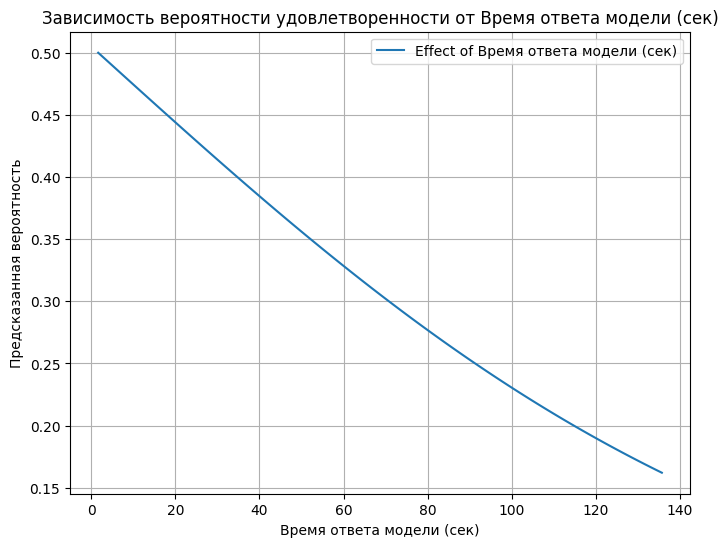

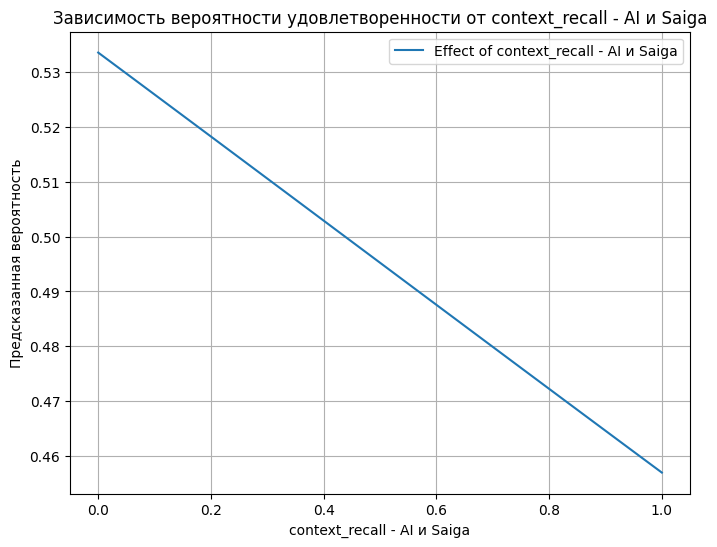

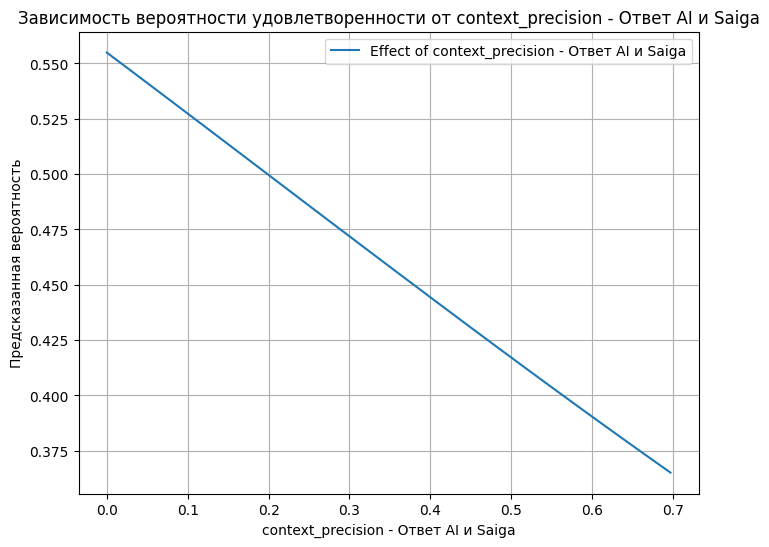

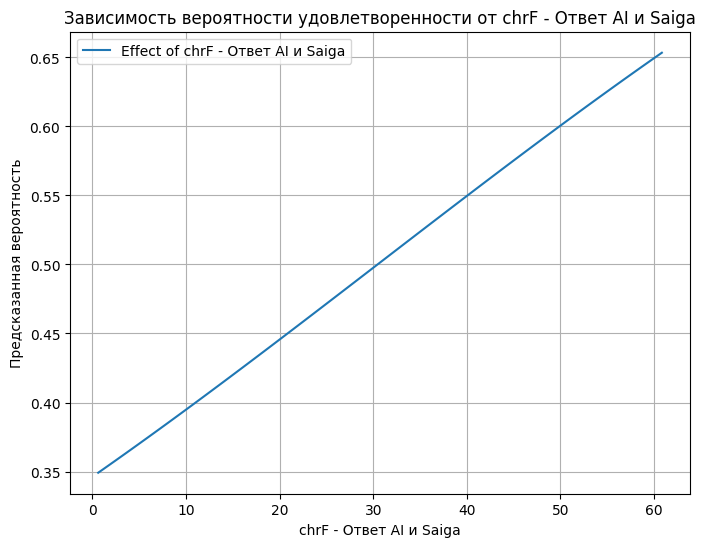

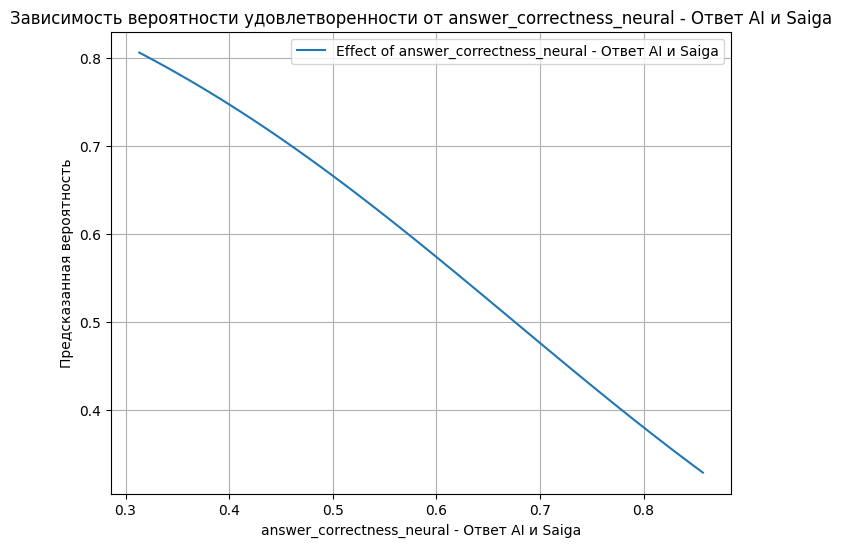

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Загрузка данных
data = pd.read_csv("final_with_random_data.csv")

# 2. Предобработка данных
data['target'] = data['random_flag']  # Целевая переменная: удовлетворенность клиента (0 или 1)
predictors = [
    'Время ответа модели (сек)',
    'context_recall - AI и Saiga',
    'context_precision - Ответ AI и Saiga',
    'chrF - Ответ AI и Saiga',
    'answer_correctness_neural - Ответ AI и Saiga'
]

X = data[predictors]
y = data['target']

# Удаляем пропуски
data = data.dropna(subset=predictors + ['target'])

# Добавляем константу
X = sm.add_constant(X)

# 3. Обучение логистической регрессии
logit_model = sm.Logit(y, X)
result = logit_model.fit()


# 4. Функция для построения зависимости X и Y
def plot_marginal_effects(result, data, predictor, fixed_values):
    """
    Построение зависимости между значением предиктора и вероятностью положительного исхода.

    result: обученная модель логистической регрессии.
    data: DataFrame с данными.
    predictor: Название предиктора для анализа.
    fixed_values: Словарь с фиксированными значениями остальных переменных.
    """
    # Генерируем значения для выбранного предиктора
    predictor_values = np.linspace(data[predictor].min(), data[predictor].max(), 100)

    # Создаём DataFrame с фиксированными значениями остальных переменных
    fixed_data = pd.DataFrame({key: [value] * len(predictor_values) for key, value in fixed_values.items()})
    fixed_data[predictor] = predictor_values

    # Добавляем константу
    fixed_data = sm.add_constant(fixed_data)

    # Вычисляем предсказанные вероятности
    predicted_probabilities = result.predict(fixed_data)

    # Построение графика
    plt.figure(figsize=(8, 6))
    plt.plot(predictor_values, predicted_probabilities, label=f"Effect of {predictor}")
    plt.title(f"Зависимость вероятности удовлетворенности от {predictor}")
    plt.xlabel(predictor)
    plt.ylabel("Предсказанная вероятность")
    plt.grid(True)
    plt.legend()
    plt.show()

# 5. Построение графиков для каждого предиктора
fixed_values = {
    'const': 1,
    'Время ответа модели (сек)': data['Время ответа модели (сек)'].mean(),
    'context_recall - AI и Saiga': data['context_recall - AI и Saiga'].mean(),
    'context_precision - Ответ AI и Saiga': data['context_precision - Ответ AI и Saiga'].mean(),
    'chrF - Ответ AI и Saiga': data['chrF - Ответ AI и Saiga'].mean(),
    'answer_correctness_neural - Ответ AI и Saiga': data['answer_correctness_neural - Ответ AI и Saiga'].mean()
}

for predictor in predictors:
    plot_marginal_effects(result, data, predictor, fixed_values)




<ipython-input-4-ee24d5cb0287>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors='coerce')
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-4-ee24d5cb0287>:83: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='Marginal Effect', y='Variable', data=margeff_df, join=False, color='blue')



Финальные типы данных в X:
Время ответа модели (сек)                      float64
context_recall - Ответ AI и Giga               float64
context_precision - Ответ AI и Giga            float64
chrF - Ответ AI и Giga                         float64
answer_correctness_neural - Ответ AI и Giga    float64
Edu_Магистратура                                 int64
Edu_Специалитет                                  int64
dtype: object

Финальные типы данных в y:
int64

np.asarray(X)[:5]:
[[ 3.517504    0.65217391  0.37704918 41.75785303  0.75883162  0.
   0.        ]
 [ 3.763305    0.92857143  0.57377049 46.63993818  0.7695241   0.
   0.        ]
 [ 1.813993    0.64285714  0.34285714 26.34061644  0.62019438  0.
   0.        ]
 [ 4.789084    0.89655172  0.81967213 61.93668271  0.85445738  0.
   0.        ]
 [ 3.572672    0.5106383   0.59210526 45.29777695  0.75463772  0.
   0.        ]]

np.asarray(y)[:5]:
[1 1 0 1 0]
         Current function value: 0.687341
         Iterations: 35
               

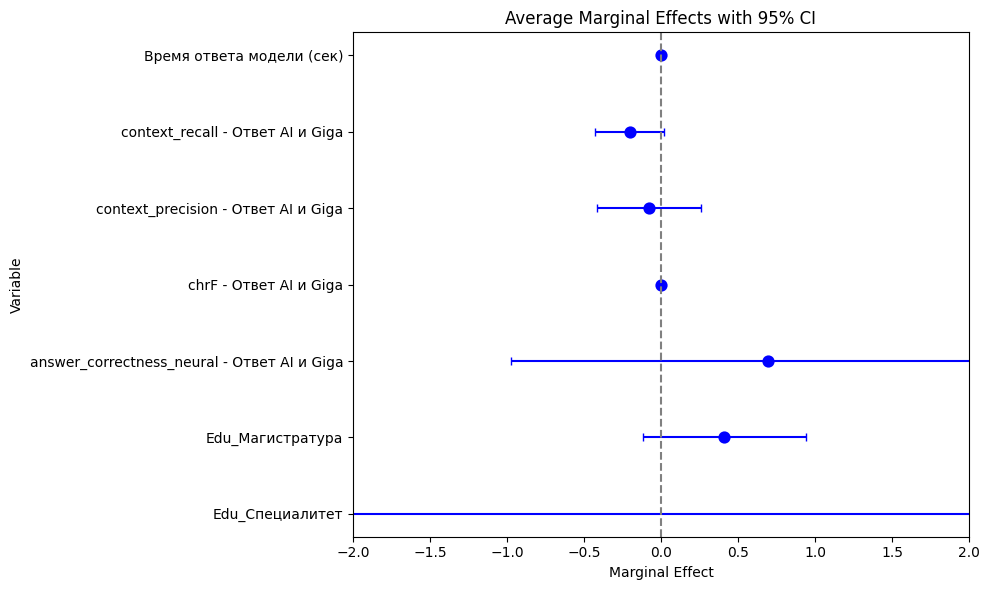

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.discrete.discrete_model import Logit

# Загрузка данных
data = pd.read_csv('final.csv')

# Выбор переменных
selected_features = [
    'Время ответа модели (сек)',
    'context_recall - Ответ AI и Giga',
    'context_precision - Ответ AI и Giga',
    'chrF - Ответ AI и Giga',
    'answer_correctness_neural - Ответ AI и Giga',
    'Уровень образования'
]
target = 'random_flag'

# Удаляем строки с пропущенными значениями
data = data.dropna(subset=selected_features + [target])

# Приводим random_flag к числовому типу
data[target] = pd.to_numeric(data[target], errors='coerce')
assert data[target].isin([0, 1]).all(), "random_flag должен быть 0 или 1"

# Преобразуем "Уровень образования" в dummy-переменные и сразу конвертируем в int
data = pd.get_dummies(data, columns=['Уровень образования'], drop_first=True, prefix='Edu')
data[[col for col in data.columns if 'Edu_' in col]] = data[[col for col in data.columns if 'Edu_' in col]].astype(int)

# Обновляем список признаков
dummy_cols = [col for col in data.columns if 'Edu_' in col]
features = [f for f in selected_features if f != 'Уровень образования'] + dummy_cols

# Матрица X и y
X = data[features]
y = data[target]

# Приводим все столбцы в X к численному типу (на всякий случай)
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Удаляем строки с NaN и синхронизируем
X = X.dropna()
y = y.loc[X.index]

# Проверяем финальные типы данных
print("\nФинальные типы данных в X:")
print(X.dtypes)
print("\nФинальные типы данных в y:")
print(y.dtype)
print("\nnp.asarray(X)[:5]:")
print(np.asarray(X)[:5])
print("\nnp.asarray(y)[:5]:")
print(np.asarray(y)[:5])

# Добавляем константу
X = sm.add_constant(X)

# Обучение модели
model = Logit(y, X)
result = model.fit()
print(result.summary())

# Вычисление предельных эффектов
marginal_effects = result.get_margeff(at='overall')
print(marginal_effects.summary())
# После вычисления marginal_effects и создания margeff_df:
margeff_df = pd.DataFrame({
    'Variable': X.columns[1:],  # Исключаем константу
    'Marginal Effect': marginal_effects.margeff,
    'Std Error': marginal_effects.margeff_se
})

# Проверяем диапазон предельных эффектов
print("\nДиапазон предельных эффектов:")
print(margeff_df['Marginal Effect'].describe())

# Визуализация предельных эффектов (Forest Plot) с улучшенным масштабом
plt.figure(figsize=(10, 6))
sns.pointplot(x='Marginal Effect', y='Variable', data=margeff_df, join=False, color='blue')
plt.errorbar(
    y=margeff_df.index,
    x=margeff_df['Marginal Effect'],
    xerr=margeff_df['Std Error'] * 1.96,  # 95% доверительный интервал
    fmt='none',
    c='blue',
    capsize=3
)
plt.axvline(x=0, color='gray', linestyle='--')

# Устанавливаем пределы оси X для более читаемого графика (например, от -0.05 до 0.05)
plt.xlim(-2.0, 2.0)  # Устанавливаем пределы в зависимости от данных

plt.title('Average Marginal Effects with 95% CI')
plt.xlabel('Marginal Effect')
plt.tight_layout()
plt.show()

РЕАЛИЗАЦИЯ МЕТРИКИ КАЧЕСТВА ОТВЕТА

In [ ]:
import pandas as pd
import numpy as np

# Загрузка файла
df = pd.read_csv('final_with_random_data.csv')

# Создание новых столбцов для метрик
df['relevance'] = 0
df['confidence'] = 0
df['informativeness'] = 0
df['directness'] = 0


# Установите веса
w1, w2, w3, w4 = 0.25, 0.25, 0.25, 0.25

# Расчет relevance
df['relevance'] = (df['context_recall - Ответ AI и Giga'] + df['context_precision - Ответ AI и Giga'] + df['answer_correctness_neural - Ответ AI и Giga']) / 3

# Расчет confidence
df['confidence'] = 1 - (df['Время ответа модели (сек)'] / df['Время ответа модели (сек)'].max())

# Расчет informativeness
# Сначала посчитаем длину ответа из столбца 'Ответ AI'
df['answer_length'] = df['Ответ AI'].apply(len)
df['informativeness'] = df['answer_length'] / df['answer_length'].max()

# Список шаблонных отказов
template_refusals = ['Извините, я не могу ответить на этот вопрос.', 'К сожалению, я не знаю ответа на этот вопрос.', 'Я не уверен в ответе на этот вопрос.','Давайте поговорим о чем нибудь другом']

def is_direct(answer):
    for refusal in template_refusals:
        if refusal.lower() in answer.lower():
            return 0
    return 1


df['quality_score'] = 0

# Расчет directness
df['directness'] = df['Ответ AI'].apply(is_direct)

# Расчет quality_score
df['quality_score'] = w1 * df['relevance'] + w2 * df['confidence'] + w3 * df['informativeness'] + w4 * df['directness']

# Сохранение изменений в файл
df.to_csv('final_with_random_data.csv', index=False)

print(df[['relevance', 'confidence', 'informativeness', 'directness', 'quality_score']])


df.head()


     relevance  confidence  informativeness  directness  quality_score
0     0.596018    0.974080         0.391837           1       0.740484
1     0.757289    0.972268         0.336327           1       0.766471
2     0.535303    0.986633         0.149388           1       0.667831
3     0.856894    0.964709         0.471837           1       0.823360
4     0.619127    0.973673         0.323265           1       0.729016
..         ...         ...              ...         ...            ...
865   0.446362    0.985678         0.126531           1       0.639643
866   0.721371    0.978484         0.303673           1       0.750882
867   0.743195    0.975329         0.333878           1       0.763101
868   0.815100    0.976297         0.297143           1       0.772135
869   0.646708    0.966540         0.568163           1       0.795353

[870 rows x 5 columns]


,Unnamed: 0.1,Unnamed: 0,Выбранная роль,Кампус,Уровень образования,Категория вопроса,Вопрос пользователя,Ресурсы для ответа,Ответ AI,Время ответа модели (сек),...,answer_correctness_neural - Ответ AI и Giga,answer_correctness_neural - Ответ AI и Saiga,answer_correctness_neural - Saiga и Giga,random_timestamp,relevance,confidence,informativeness,directness,answer_length,quality_score
0,0,0,Студент,Нижний Новгород,Бакалавриат,Наука,"Для чего нужно подробное изучение науки, прове...",[Document(page_content='Конкурсы игранты НИУВШ...,Я могу частично ответить на данный вопрос: про...,3.517504,...,0.758832,0.733138,0.759762,2025-01-31 04:32:15.315835656,0.596018,0.974080,0.391837,1,480,0.740484
1,1,1,Студент,Москва,Бакалавриат,Социальные вопросы,Нужно ли подавать какие-то дополнительные доку...,[Document(page_content='Материальная помощь и ...,Дополнительные документы для продления социаль...,3.763305,...,0.769524,0.765127,0.718018,2025-06-04 15:00:23.982617275,0.757289,0.972268,0.336327,1,412,0.766471
2,2,2,Студент,Нижний Новгород,Бакалавриат,Военка,"я 120см, смогу ли я попасть на военку?",[Document(page_content='енной службы с зачисле...,"Что-то в вашем вопросе меня смущает. Может, по...",1.813993,...,0.620194,0.599259,0.714013,2025-10-26 19:30:31.520295701,0.535303,0.986633,0.149388,1,183,0.667831
3,3,3,Студент,Москва,Бакалавриат,Финансовые вопросы,Нужно ли подавать какие-то дополнительные доку...,[Document(page_content='Материальная помощь и ...,Дополнительные документы для продления социаль...,4.789084,...,0.854457,0.758682,0.718018,2025-03-27 19:50:42.672021693,0.856894,0.964709,0.471837,1,578,0.823360
4,4,4,Студент,Нижний Новгород,Бакалавриат,Цифровые сервисы и Техподдержка,Если во время прохождения теста в смарт лмс пр...,[Document(page_content='Learning management sy...,Я не нашел конкретного ответа на ваш вопрос о ...,3.572672,...,0.754638,0.661262,0.681225,2025-09-21 07:19:55.103639366,0.619127,0.973673,0.323265,1,396,0.729016


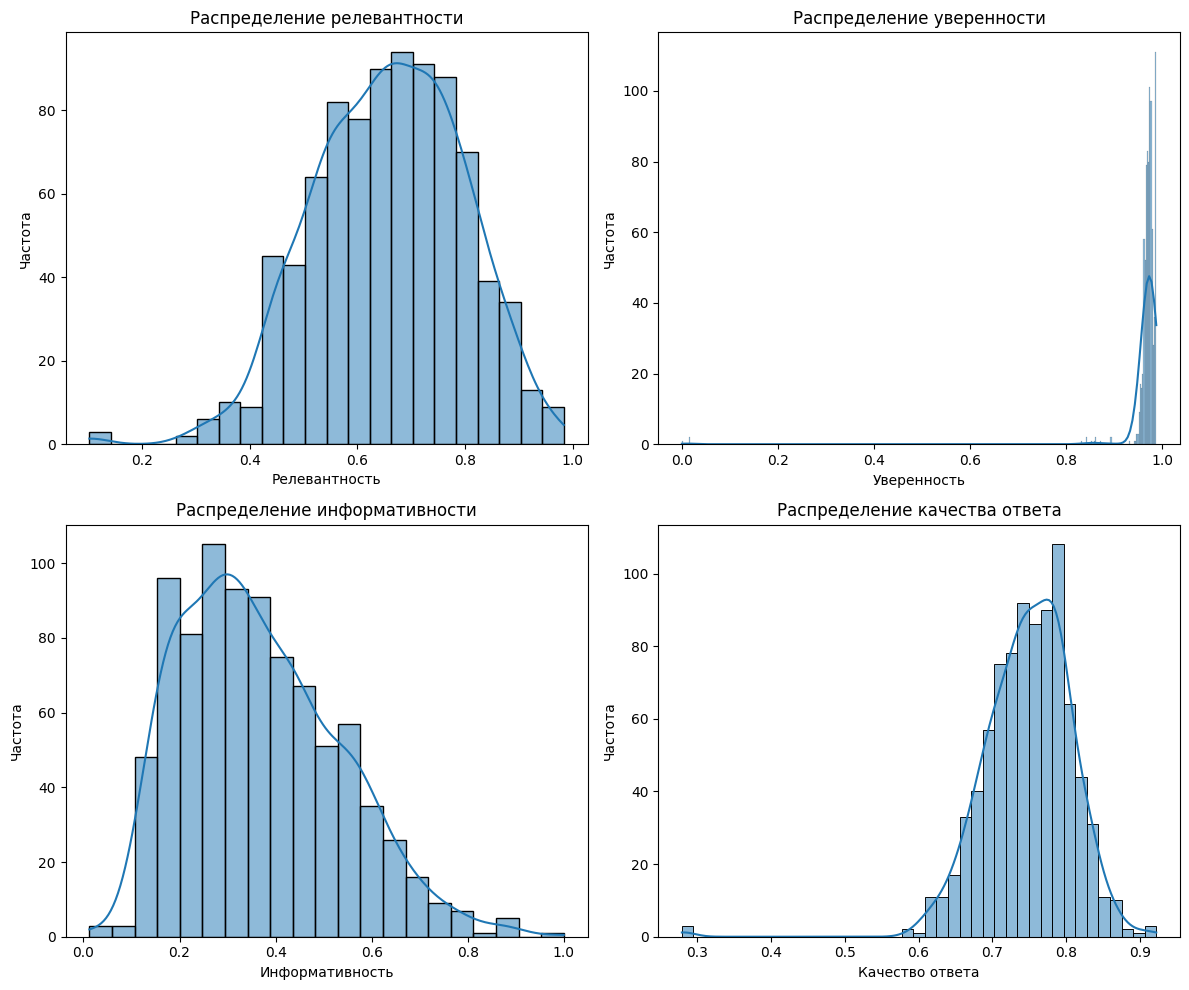

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Загрузка данных
df = pd.read_csv('final_with_random_data.csv')

# Создание фигуры и осей
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# График распределения relevance
sns.histplot(df['relevance'], ax=axs[0, 0], kde=True)
axs[0, 0].set_title('Распределение релевантности')
axs[0, 0].set_xlabel('Релевантность')
axs[0, 0].set_ylabel('Частота')

# График распределения confidence
sns.histplot(df['confidence'], ax=axs[0, 1], kde=True)
axs[0, 1].set_title('Распределение уверенности')
axs[0, 1].set_xlabel('Уверенность')
axs[0, 1].set_ylabel('Частота')

# График распределения informativeness
sns.histplot(df['informativeness'], ax=axs[1, 0], kde=True)
axs[1, 0].set_title('Распределение информативности')
axs[1, 0].set_xlabel('Информативность')
axs[1, 0].set_ylabel('Частота')

# График распределения quality_score
sns.histplot(df['quality_score'], ax=axs[1, 1], kde=True)
axs[1, 1].set_title('Распределение качества ответа')
axs[1, 1].set_xlabel('Качество ответа')
axs[1, 1].set_ylabel('Частота')

# Layout так, чтобы подписи не перекрывались
fig.tight_layout()

plt.show()


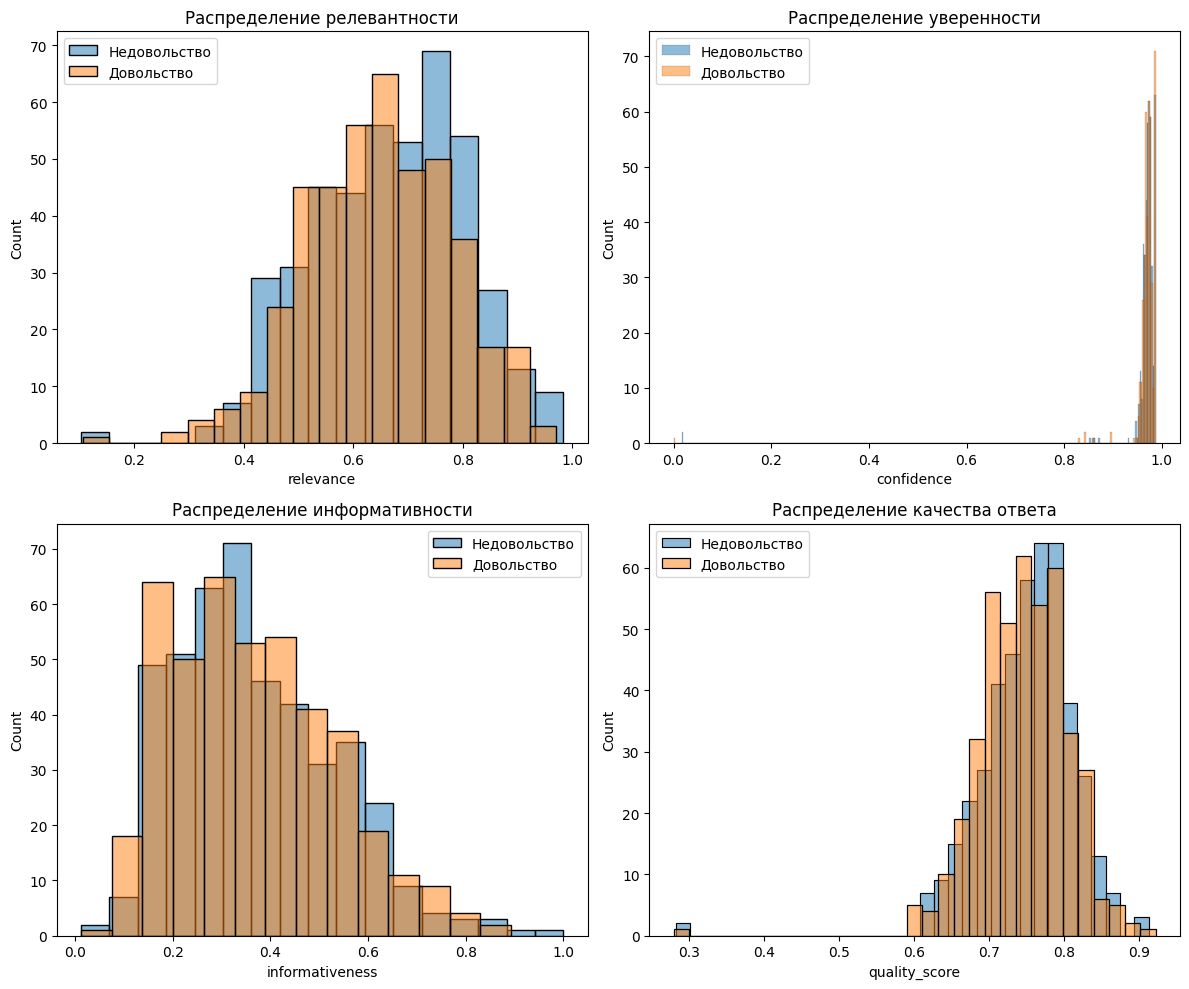

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограммы для каждой категории
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df[df['random_flag'] == 0]['relevance'], ax=axs[0, 0], label='Недовольство', alpha=0.5)
sns.histplot(df[df['random_flag'] == 1]['relevance'], ax=axs[0, 0], label='Довольство', alpha=0.5)
axs[0, 0].set_title('Распределение релевантности')
axs[0, 0].legend()

sns.histplot(df[df['random_flag'] == 0]['confidence'], ax=axs[0, 1], label='Недовольство', alpha=0.5)
sns.histplot(df[df['random_flag'] == 1]['confidence'], ax=axs[0, 1], label='Довольство', alpha=0.5)
axs[0, 1].set_title('Распределение уверенности')
axs[0, 1].legend()

sns.histplot(df[df['random_flag'] == 0]['informativeness'], ax=axs[1, 0], label='Недовольство', alpha=0.5)
sns.histplot(df[df['random_flag'] == 1]['informativeness'], ax=axs[1, 0], label='Довольство', alpha=0.5)
axs[1, 0].set_title('Распределение информативности')
axs[1, 0].legend()

sns.histplot(df[df['random_flag'] == 0]['quality_score'], ax=axs[1, 1], label='Недовольство', alpha=0.5)
sns.histplot(df[df['random_flag'] == 1]['quality_score'], ax=axs[1, 1], label='Довольство', alpha=0.5)
axs[1, 1].set_title('Распределение качества ответа')
axs[1, 1].legend()

fig.tight_layout()
plt.show()


In [ ]:
from scipy.stats import pointbiserialr

# Корреляционный анализ
correlation_relevance = pointbiserialr(df['random_flag'], df['relevance'])
correlation_confidence = pointbiserialr(df['random_flag'], df['confidence'])
correlation_informativeness = pointbiserialr(df['random_flag'], df['informativeness'])
correlation_quality_score = pointbiserialr(df['random_flag'], df['quality_score'])

print(f"Корреляция релевантности и удовлетворенности: {correlation_relevance.correlation}")
print(f"Корреляция уверенности и удовлетворенности: {correlation_confidence.correlation}")
print(f"Корреляция информативности и удовлетворенности: {correlation_informativeness.correlation}")
print(f"Корреляция качества ответа и удовлетворенности: {correlation_quality_score.correlation}")


Корреляция релевантности и удовлетворенности: -0.06208948694371864
Корреляция уверенности и удовлетворенности: 0.014430031668600112
Корреляция информативности и удовлетворенности: -0.010496464556806749
Корреляция качества ответа и удовлетворенности: -0.03843276190076578
